## 간호사 월급 예측

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import xgboost as xgb

import matplotlib.font_manager as fm
import matplotlib

font_path = '/Users/hwangjunho/Desktop/encore_skn11/04_data-analysis/03_matplotlib/AppleSDGothicNeo.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

,사원ID,나이,퇴사여부,출장빈도,일일급여,부서,출퇴근거리(km),교육수준,전공분야,총직원수,...,관계만족도,주당표준근무시간,근무조,총경력연수,연간교육횟수,워라밸지수,회사근속연수,현재직무근속연수,마지막승진이후연수,현매니저와근속연수
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


데이터 구조 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   사원ID       1676 non-null   int64 
 1   나이         1676 non-null   int64 
 2   퇴사여부       1676 non-null   object
 3   출장빈도       1676 non-null   object
 4   일일급여       1676 non-null   int64 
 5   부서         1676 non-null   object
 6   출퇴근거리(km)  1676 non-null   int64 
 7   교육수준       1676 non-null   int64 
 8   전공분야       1676 non-null   object
 9   총직원수       1676 non-null   int64 
 10  근무환경만족도    1676 non-null   int64 
 11  성별         1676 non-null   object
 12  시급         1676 non-null   int64 
 13  직무몰입도      1676 non-null   int64 
 14  직급         1676 non-null   int64 
 15  직무         1676 non-null   object
 16  직무만족도      1676 non-null   int64 
 17  결혼상태       1676 non-null   object
 18  월급         1676 non-null   int64 
 19  월별급여율      1676 non-null   int64 
 20  이전근무회사수    1676 non

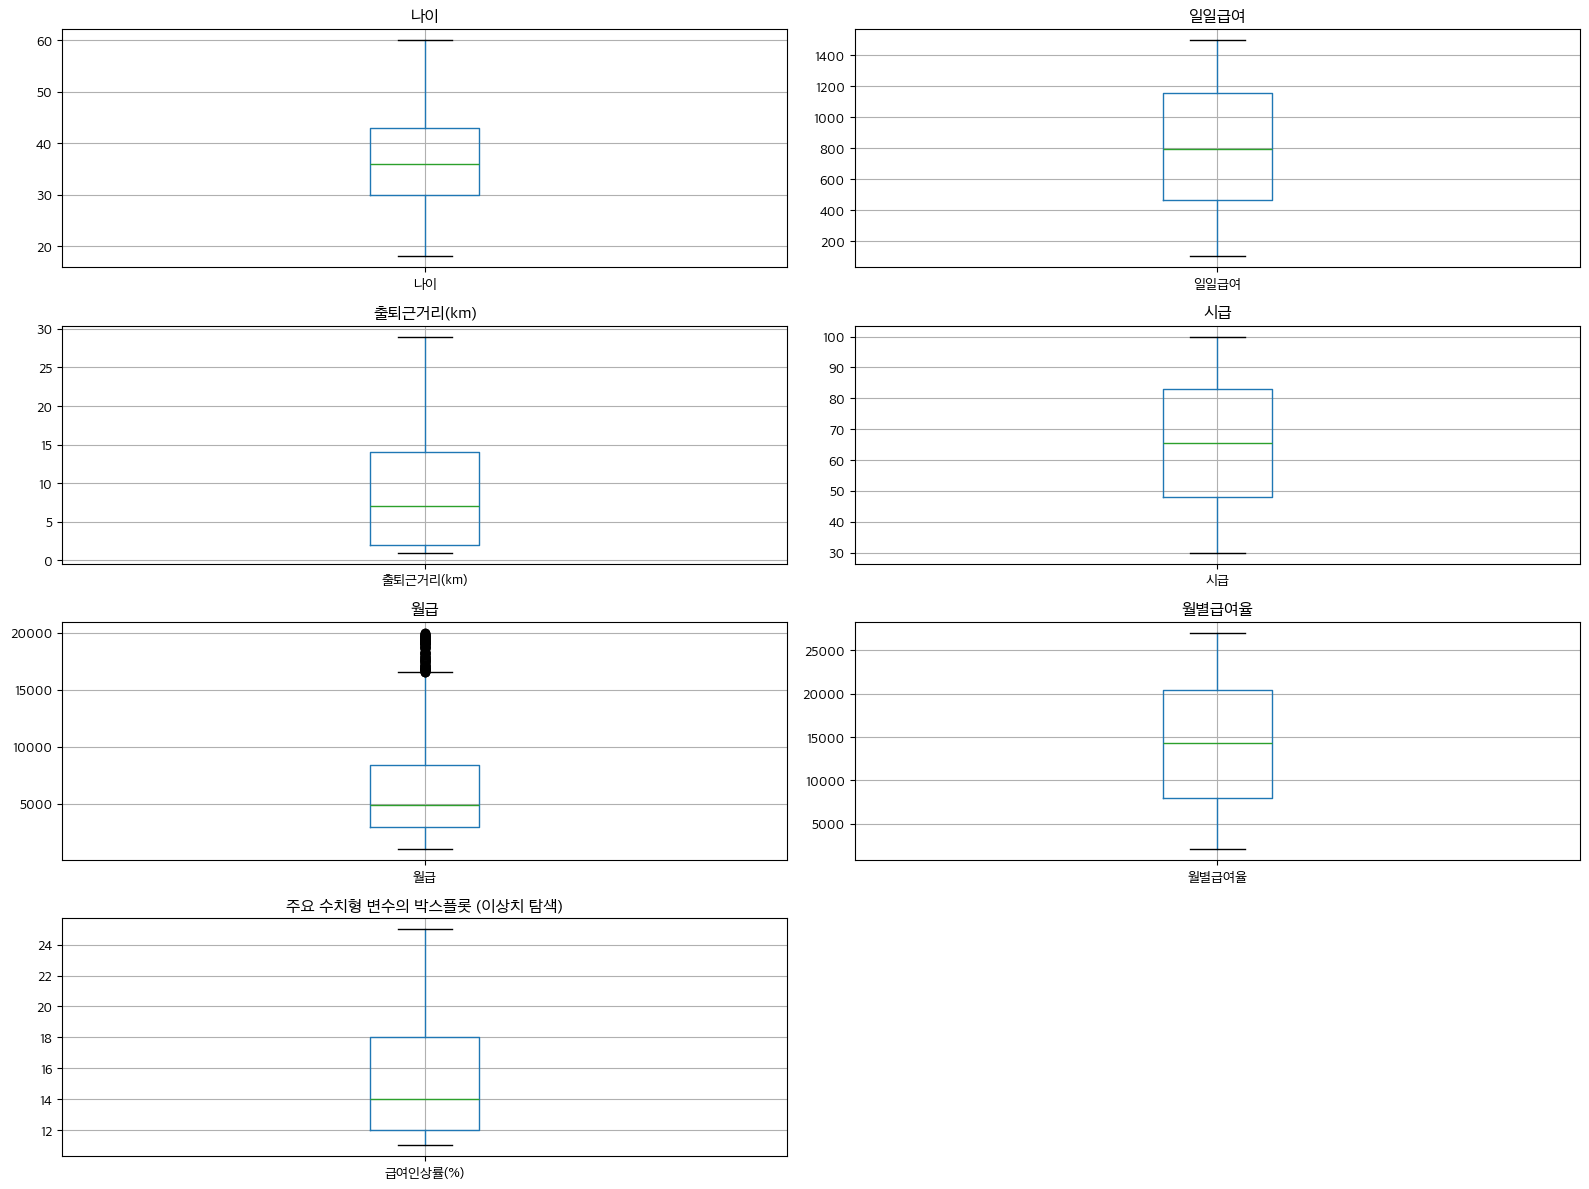

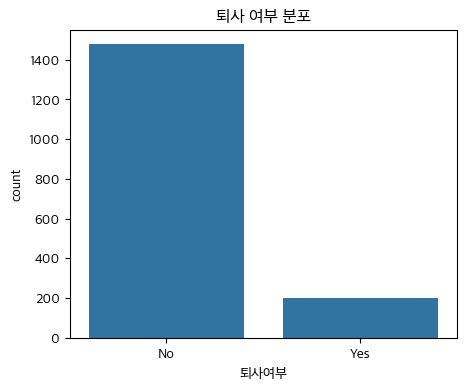

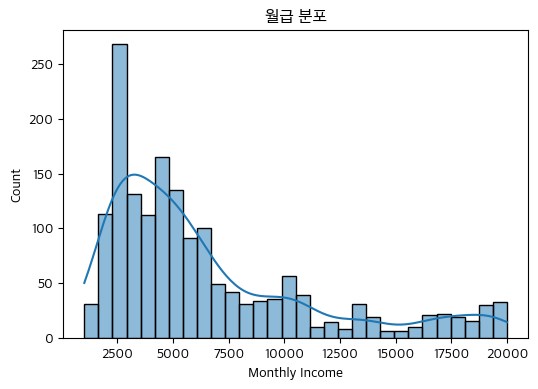

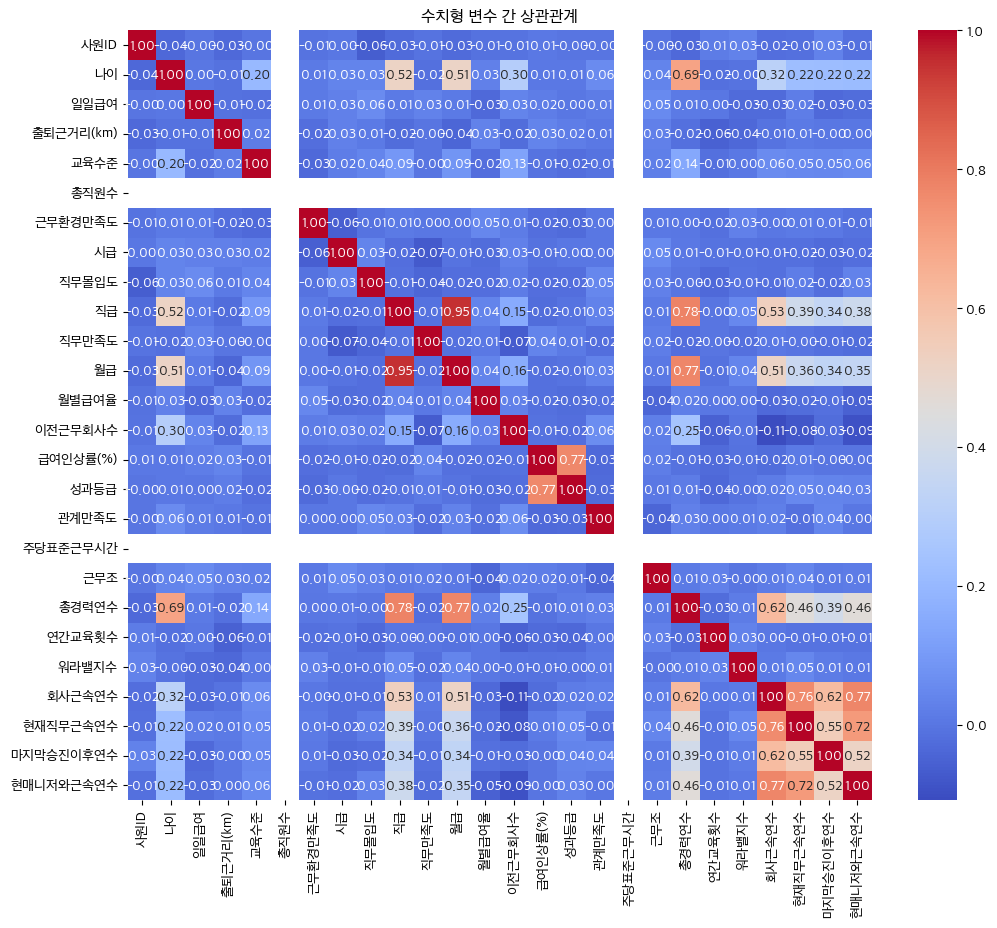

전처리 완료된 데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   나이                      1676 non-null   int64
 1   교육수준                    1676 non-null   int64
 2   직급                      1676 non-null   int64
 3   월급                      1676 non-null   int64
 4   이전근무회사수                 1676 non-null   int64
 5   성과등급                    1676 non-null   int64
 6   근무조                     1676 non-null   int64
 7   총경력연수                   1676 non-null   int64
 8   회사근속연수                  1676 non-null   int64
 9   현재직무근속연수                1676 non-null   int64
 10  마지막승진이후연수               1676 non-null   int64
 11  현매니저와근속연수               1676 non-null   int64
 12  퇴사여부_Yes                1676 non-null   bool 
 13  출장빈도_Travel_Frequently  1676 non-null   bool 
 14  출장빈도_Travel_Rarely      1676 non-null   bool 
 15  부서

In [46]:
# 1. 데이터 불러오기
df = pd.read_csv('data/watson_healthcare_modified.csv')

# 1-1. 컬럼명을 한국어로 변경
df = df.rename(columns={
    'EmployeeID': '사원ID',
    'Age': '나이',
    'Attrition': '퇴사여부',
    'BusinessTravel': '출장빈도',
    'DailyRate': '일일급여',
    'Department': '부서',
    'DistanceFromHome': '출퇴근거리(km)',
    'Education': '교육수준',
    'EducationField': '전공분야',
    'EmployeeCount': '총직원수',
    'EnvironmentSatisfaction': '근무환경만족도',
    'Gender': '성별',
    'HourlyRate': '시급',
    'JobInvolvement': '직무몰입도',
    'JobLevel': '직급',
    'JobRole': '직무',
    'JobSatisfaction': '직무만족도',
    'MaritalStatus': '결혼상태',
    'MonthlyIncome': '월급',
    'MonthlyRate': '월별급여율',
    'NumCompaniesWorked': '이전근무회사수',
    'Over18': '성인여부',
    'OverTime': '초과근무여부',
    'PercentSalaryHike': '급여인상률(%)',
    'PerformanceRating': '성과등급',
    'RelationshipSatisfaction': '관계만족도',
    'StandardHours': '주당표준근무시간',
    'Shift': '근무조',
    'TotalWorkingYears': '총경력연수',
    'TrainingTimesLastYear': '연간교육횟수',
    'WorkLifeBalance': '워라밸지수',
    'YearsAtCompany': '회사근속연수',
    'YearsInCurrentRole': '현재직무근속연수',
    'YearsSinceLastPromotion': '마지막승진이후연수',
    'YearsWithCurrManager': '현매니저와근속연수'
})

display(df)

# 2. 데이터 구조 및 기초 통계 확인
print("데이터 구조 정보:")
print(df.info())

print("기초 통계 요약:")
print(df.describe())

# 3. 결측치 및 이상치 탐색
print("결측치 확인:")
print(df.isnull().sum())

numeric_cols = ['나이', '일일급여', '출퇴근거리(km)', '시급', '월급', '월별급여율', '급여인상률(%)']
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 2, i + 1)  # 4행 2열 배치 중 i+1번째 (남는 한 칸은 빈칸으로 남음)
    df.boxplot(column=col)
    plt.title(col)
    plt.tight_layout()
plt.title("주요 수치형 변수의 박스플롯 (이상치 탐색)")
plt.tight_layout()
plt.show()

# 4. 데이터 시각화를 통한 탐색

# 퇴사여부 분포
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='퇴사여부')
plt.title("퇴사 여부 분포")
plt.show()

# 월급 분포
plt.figure(figsize=(6, 4))
sns.histplot(df['월급'], kde=True, bins=30)
plt.title("월급 분포")
plt.xlabel("Monthly Income")
plt.show()

# 상관관계 히트맵
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("수치형 변수 간 상관관계")
plt.show()

# 5. 데이터 정제 및 전처리
df = df.drop(columns=['사원ID', '성인여부', '일일급여', '출퇴근거리(km)', '근무환경만족도', '시급', '직무몰입도', '직무만족도', '월별급여율', '급여인상률(%)', '관계만족도','주당표준근무시간', '연간교육횟수', '워라밸지수','총직원수'])

# 범주형 변수 원핫 인코딩
df_encoded = pd.get_dummies(df, drop_first=True)

print("전처리 완료된 데이터프레임 정보:")
print(df_encoded.info())



# 7. 데이터 분할
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['월급'])
y = df_encoded['월급']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("학습용 데이터 크기:", X_train.shape)
print("테스트용 데이터 크기:", X_test.shape)


In [47]:
# 스케일링 (KNN, XGBoost 외에선 필수는 아님)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. 다양한 모델 학습 및 평가

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"[{name}]")
    print(model.score(X_train, y_train), model.score(X_test, y_test))
    print(f" - MSE: {mse:.2f}")
    print(f" - R^2: {r2:.4f}")
    print()

# 선형 회귀
lr_model = LinearRegression()
evaluate_model("선형 회귀", lr_model, X_train_scaled, X_test_scaled, y_train, y_test)

# 랜덤 포레스트
rf_model = RandomForestRegressor(random_state=42)
evaluate_model("랜덤 포레스트", rf_model, X_train, X_test, y_train, y_test)

# KNN 회귀
knn_model = KNeighborsRegressor(n_neighbors=5)
evaluate_model("KNN 회귀", knn_model, X_train_scaled, X_test_scaled, y_train, y_test)

# XGBoost 회귀
xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
evaluate_model("XGBoost 회귀", xgb_model, X_train, X_test, y_train, y_test)


[선형 회귀]
0.9287780908438774 0.9264566927394745
 - MSE: 1744014.39
 - R^2: 0.9265

[랜덤 포레스트]
0.9926296287638479 0.9504736890242796
 - MSE: 1174472.60
 - R^2: 0.9505

[KNN 회귀]
0.8508813277149754 0.7855403776093648
 - MSE: 5085719.98
 - R^2: 0.7855

[XGBoost 회귀]
0.9994153380393982 0.9430169463157654
 - MSE: 1351303.38
 - R^2: 0.9430

